# P123 単一ニューロンの実装

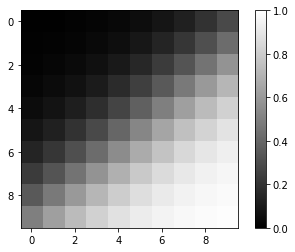

In [ ]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt

# x、y座標
X = np.arange(-1.0, 1.0, 0.2)  # 要素数は10個
Y = np.arange(-1.0, 1.0, 0.2)

# 出力を格納する10x10のグリッド
Z = np.zeros((10,10))

# x、y座標の入力の重み
w_x = 2.5
w_y = 3.0

# バイアス
bias = 0.1

# グリッドの各マスでニューロンの演算
for i in range(10):
  for j in range(10):
    # 入力の重みの積の総和+バイアス
    u = X[i]*w_x + Y[j]*w_y + bias
    # グリッドに出力を格納
    y = 1/(1+np.exp(-u)) # シグモイド関数
    Z[j][i] = y

# グリッドの表示
plt.imshow(Z, "gray", vmin = 0.0, vmax = 1.0)
plt.colorbar()  
plt.show()

# P129 ニューラルネットワーク（回帰）

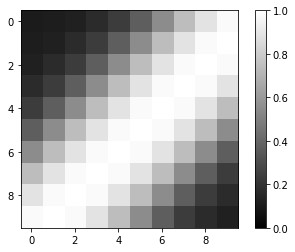

In [ ]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt

# x、y座標
X = np.arange(-1.0, 1.0, 0.2)  # 要素数は10個
Y = np.arange(-1.0, 1.0, 0.2)

# 出力を格納する10x10のグリッド
Z = np.zeros((10,10))

# 重み
w_im = np.array([[4.0, 4.0],
                 [4.0, 4.0]]) # 中間層2×2の行列
w_mo = np.array([[1.0], 
                 [-1.0]]) # 出力層2×1の行列

# バイアス
b_im = np.array([3.0, -3.0]) # 中間層
b_mo = np.array([0.1]) # 出力層

# 中間層
def middle_layer(x, w, b):
  u = np.dot(x, w) + b
  return 1/(1+np.exp(-u)) # シグモイド関数


# 出力層
def output_layer(x, w, b):
  u = np.dot(x, w) + b
  return u # 恒等関数


# グリッドの各マスでニューラルネットワークの演算
for i in range(10):
  for j in range(10):

    # 順伝播
    inp = np.array([X[i], Y[j]]) # 入力層
    mid = middle_layer(inp, w_im, b_im) # 中間層
    out = output_layer(mid, w_mo, b_mo) # 出力層

    # グリッドにNNの出力を格納
    Z[j][i] = out[0]

# グリッドの表示
plt.imshow(Z, "gray", vmin = 0.0, vmax = 1.0)
plt.colorbar()  
plt.show()

# P129 ニューラルネットワーク（分類）

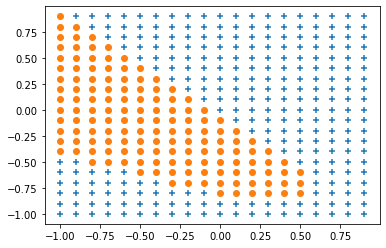

In [ ]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt

# x、y座標
X = np.arange(-1.0, 1.0, 0.1)  # 要素数は20個
Y = np.arange(-1.0, 1.0, 0.1)

# 重み
w_im = np.array([[1.0, 2.0],
                 [2.0, 3.0]]) # 中間層2×2の行列
w_mo = np.array([[-1.0, 1.0],
                 [1.0, -1.0]]) # 出力層2×2の行列

# バイアス
b_im = np.array([0.3, -0.3]) # 中間層
b_mo = np.array([0.4, 0.1]) # 出力層

# 中間層
def middle_layer(x, w, b):
  u = np.dot(w, x) + b
  return 1/(1+np.exp(-u)) # シグモイド関数

# 出力層
def output_layer(x, w, b):
  u = np.dot(x, w) + b
  return np.exp(u)/np.sum(np.exp(u)) # ソフトマックス関数


# 分類結果を格納するリスト
x_1 = []
y_1 = []
x_2 = []
y_2 = []

# グリッドの各マスでニューラルネットワークの演算
for i in range(20):
    for j in range(20):
        
        # 順伝播
        inp = np.array([X[i], Y[j]])
        mid = middle_layer(inp, w_im, b_im)
        out = output_layer(mid, w_mo, b_mo)
        
        # 確率の大小を比較し、分類する
        if out[0] > out[1]:
          x_1.append(X[i])
          y_1.append(Y[j])
        else:
          x_2.append(X[i])
          y_2.append(Y[j])

# 散布図の表示
plt.scatter(x_1, y_1, marker="+")
plt.scatter(x_2, y_2, marker="o")
plt.show()

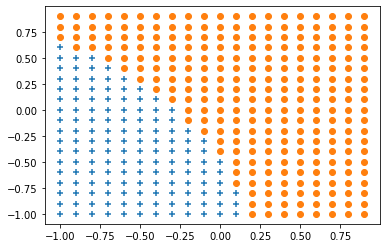

In [ ]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt

# x、y座標
X = np.arange(-1.0, 1.0, 0.1)  # 要素数は20個
Y = np.arange(-1.0, 1.0, 0.1)

# 重み
w_im = np.array([[2.0, 1.0],
                 [0.0, 3.0]]) # 中間層2×2の行列
w_mo = np.array([[-2.0, 1.0],
                 [-1.0, 1.0]]) # 出力層2×2の行列

# バイアス
b_im = np.array([-0.3, -0.3]) # 中間層
b_mo = np.array([0.4, -1.2]) # 出力層

# 中間層
def middle_layer(x, w, b):
  u = np.dot(x, w) + b
  return 1/(1+np.exp(-u)) # シグモイド関数

# 出力層
def output_layer(x, w, b):
  u = np.dot(x, w) + b
  return np.exp(u)/np.sum(np.exp(u)) # ソフトマックス関数


# 分類結果を格納するリスト
x_1 = []
y_1 = []
x_2 = []
y_2 = []

# グリッドの各マスでニューラルネットワークの演算
for i in range(20):
    for j in range(20):
        
        # 順伝播
        inp = np.array([X[i], Y[j]])
        mid = middle_layer(inp, w_im, b_im)
        out = output_layer(mid, w_mo, b_mo)
        
        # 確率の大小を比較し、分類する
        if out[0] > out[1]:
          x_1.append(X[i])
          y_1.append(Y[j])
        else:
          x_2.append(X[i])
          y_2.append(Y[j])

# 散布図の表示
plt.scatter(x_1, y_1, marker="+")
plt.scatter(x_2, y_2, marker="o")
plt.show()